# IMPORTING LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
import re


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.svm import SVC

In [5]:
import pickle
import time

# IMPORTING DATASET

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Project/Model/Final Model/DNS Tunnel/new_training_set.csv')

# DATA PREPROCESSING

In [7]:
df.head(5)

,entropy,label,len,0,1,2,3,4,5,6,7,8,9,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,!,"""",#,$,%,&,',(,),*,+,",",-,.,/,:,;,<,=,>,?,@,[,\,],^,_,`,{,|,},~,special
0,3.663533,1,22,0,1,0,0,0,1,0,0,2,1,0,0,0,0,1,0,1,0,0,0,0,1,0,3,1,0,0,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.885889,1,114,0,0,0,2,0,2,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,3,1,0,0,1,1,2,2,0,0,0,0,0,46,1,4,0,4,2,3,1,4,1,1,1,1,1,2,1,3,0,0,2,5,2,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.663533,1,22,0,1,0,0,0,1,0,0,1,2,0,0,0,0,1,0,1,0,0,0,0,1,0,3,1,0,0,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.663533,1,22,1,1,0,0,0,1,0,0,0,2,0,0,0,0,1,0,1,0,0,0,0,1,0,3,1,0,0,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.574614,1,106,4,0,1,2,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,3,1,0,0,1,1,2,2,0,0,0,0,0,26,3,4,0,4,3,2,3,1,1,0,1,2,1,4,1,4,1,0,1,6,3,3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df['label'].value_counts()

1    45293
0     8522
Name: label, dtype: int64

Splitting X and y

In [9]:
df_temp = df.copy()
y = df_temp['label']
X = df_temp.drop('label', axis = 1)

del df_temp

In [10]:
print(y.shape)
print(X.shape)

(53815,)
(53815, 97)


Splitting train and tests set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
print(X_train.shape)
print(X_test.shape)

(37670, 97)
(16145, 97)


# PLOTTING FUNCTION

In [13]:
def show_result(y_true,y_pred):
    print(metrics.classification_report(y_true,y_pred))
    plt.figure(figsize = (10,8))
    sns.heatmap(metrics.confusion_matrix(y_true, y_pred), annot = True, fmt = 'd', cmap='crest')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

def plot_curve(y_true,y_proba):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba[:,1])
    auc = metrics.roc_auc_score(y_test, y_proba[:,1])

    plt.figure(figsize=(12, 8))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.3f)' % auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# DECISION TREE

In [ ]:
print(grid_search_dt.best_params_)

{'max_depth': 40, 'max_features': 'sqrt', 'splitter': 'best'}


In [ ]:
%%time
dt_clf_final = tree.DecisionTreeClassifier( max_depth = 40, max_features = 'sqrt', splitter = 'best')
dt_clf_final.fit(X_train, y_train)

CPU times: user 46.1 ms, sys: 4.45 ms, total: 50.6 ms
Wall time: 101 ms


DecisionTreeClassifier(max_depth=40, max_features='sqrt')

In [ ]:
%%time
dt_prediction = dt_clf_final.predict(X_test)

CPU times: user 10.5 ms, sys: 1.01 ms, total: 11.5 ms
Wall time: 17.4 ms


In [ ]:
dt_vladiation = dt_clf_final.predict(X_train)

In [ ]:
dt_proba = dt_clf_final.predict_proba(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5910
           1       1.00      1.00      1.00     31760

    accuracy                           1.00     37670
   macro avg       1.00      1.00      1.00     37670
weighted avg       1.00      1.00      1.00     37670



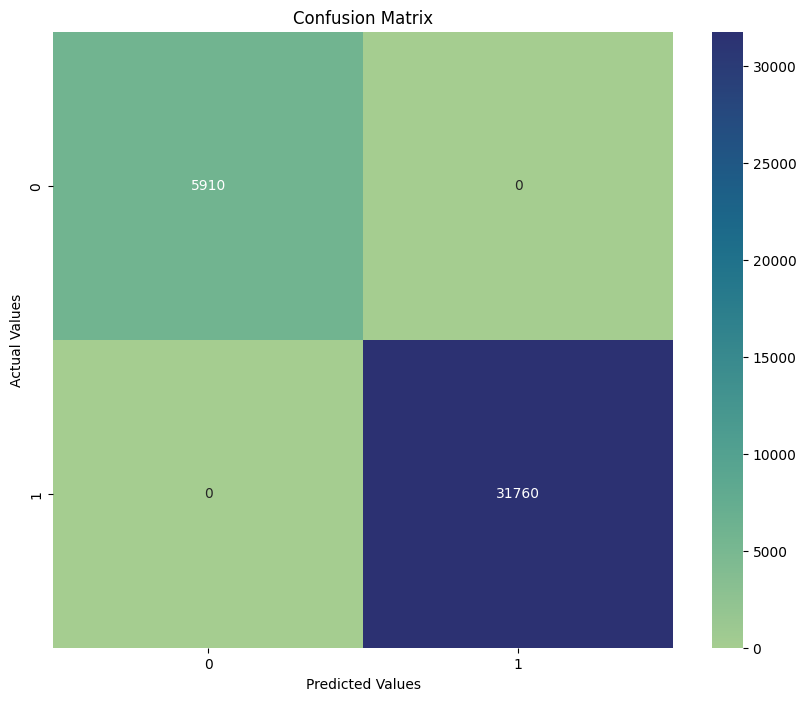

In [ ]:
show_result(y_train,dt_vladiation)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2612
           1       1.00      1.00      1.00     13533

    accuracy                           1.00     16145
   macro avg       1.00      1.00      1.00     16145
weighted avg       1.00      1.00      1.00     16145



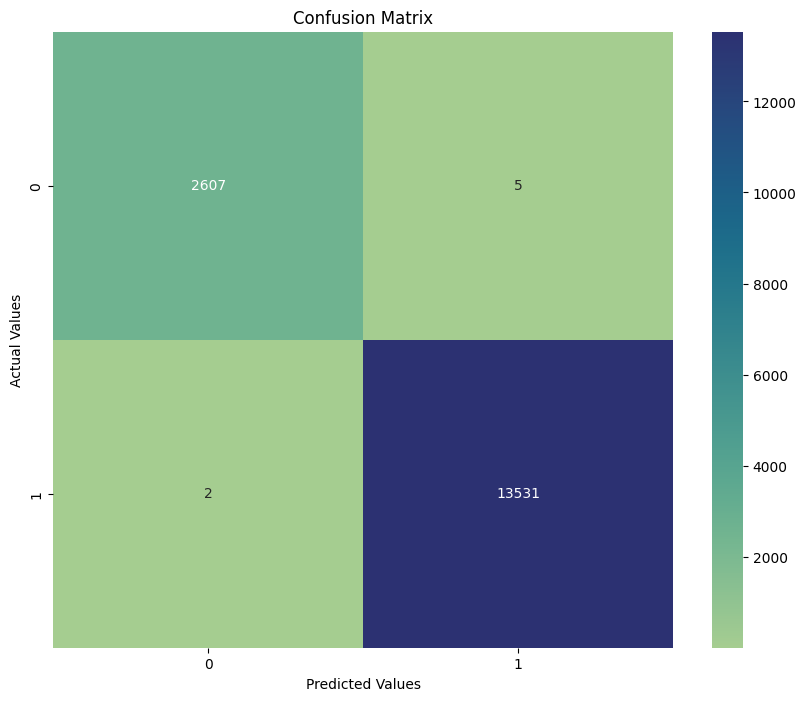

In [ ]:
show_result(y_test,dt_prediction)

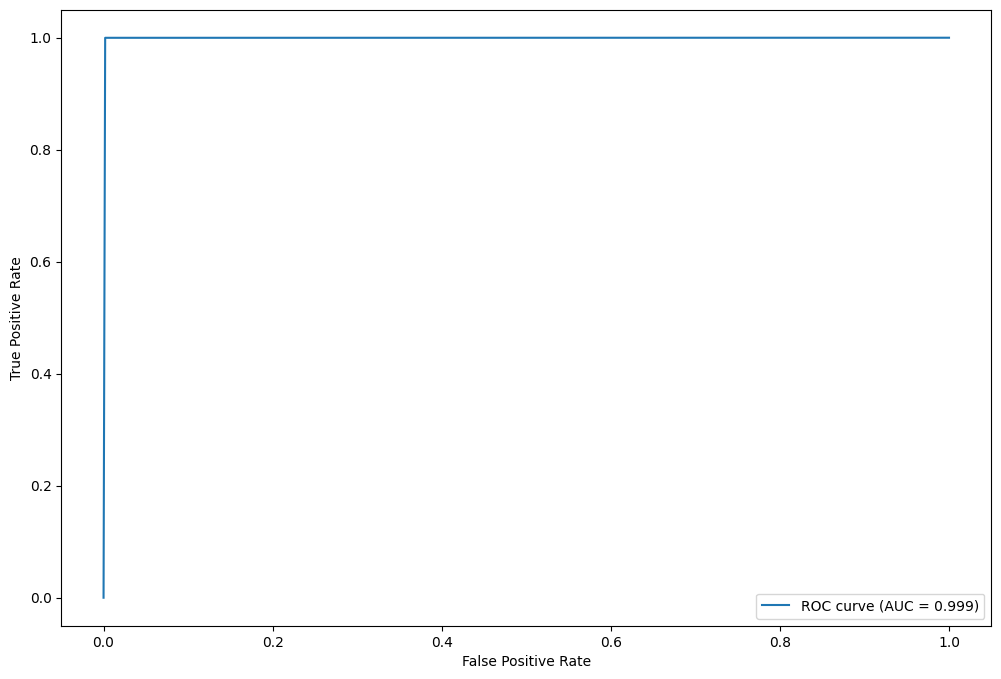

In [ ]:
plot_curve(y_test,dt_proba)

In [ ]:
filepath = '/content/drive/MyDrive/Project/Model/Final Model/binary_dt.sav'
pickle.dump(dt_clf_final, open(filepath, 'wb'))

# RANDOM FOREST

In [14]:
param_grid_rfc = {
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [10, 100, 200],
    'max_depth': [20, 40, 60]
}

rfc_clf = RandomForestClassifier()
grid_search_rfc = GridSearchCV(rfc_clf, param_grid_rfc, cv=5, verbose=2, n_jobs = 4)
grid_search_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [20, 40, 60],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 200]},
             verbose=2)

In [15]:
grid_search_rfc.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 10}

In [17]:
rfc_prediction = grid_search_rfc.best_estimator_.predict(X_test)

In [19]:
rfc_validation = grid_search_rfc.best_estimator_.predict(X_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5910
           1       1.00      1.00      1.00     31760

    accuracy                           1.00     37670
   macro avg       1.00      1.00      1.00     37670
weighted avg       1.00      1.00      1.00     37670



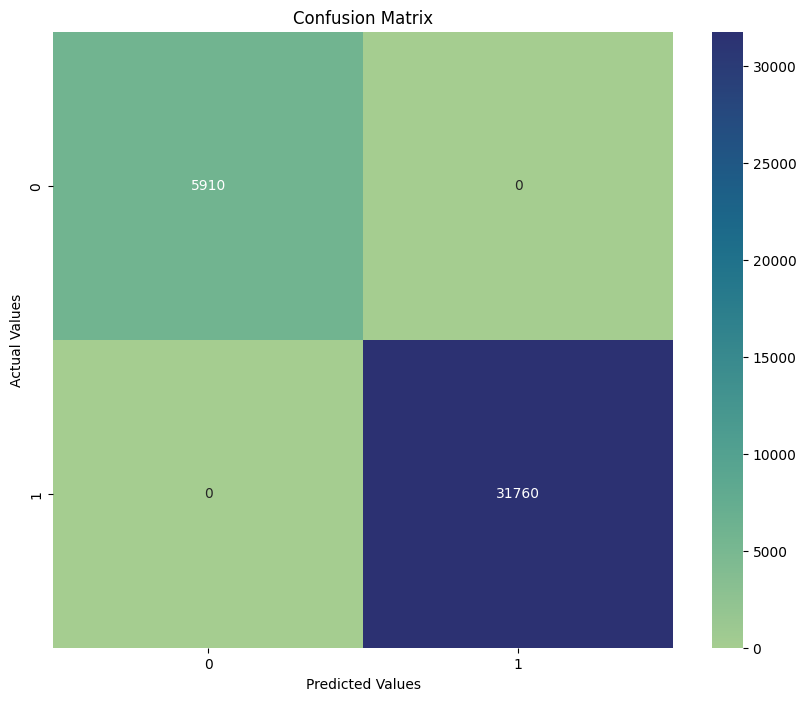

In [20]:
show_result(y_train,rfc_validation)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2612
           1       1.00      1.00      1.00     13533

    accuracy                           1.00     16145
   macro avg       1.00      1.00      1.00     16145
weighted avg       1.00      1.00      1.00     16145



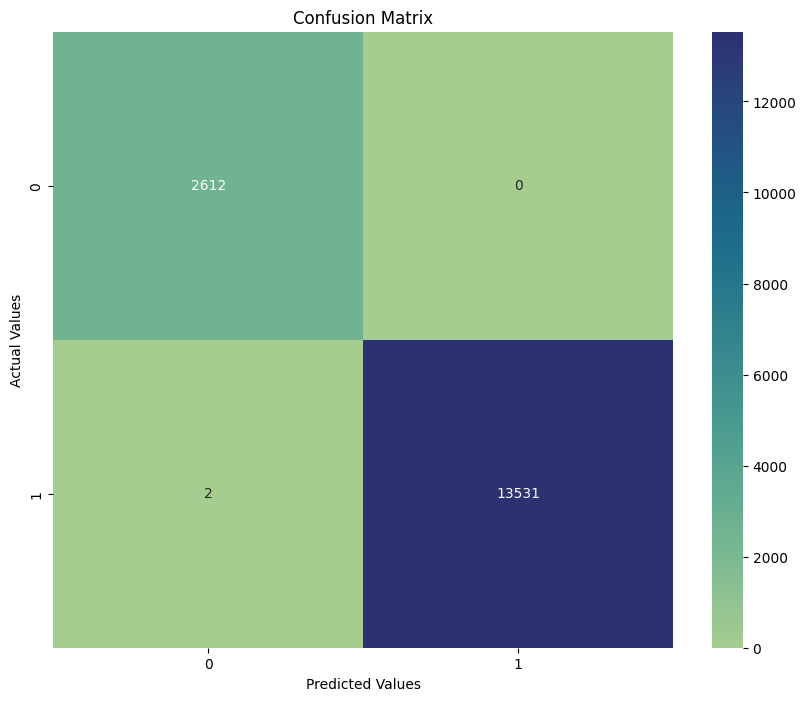

In [18]:
show_result(y_test,rfc_prediction)

# LOGISTIC REGRESSION

In [21]:
param_grid_lr = {
      'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga','newton-cholesky','liblinear'],
      'C' : [100, 10, 1.0, 0.1],
}
lr_clf = LogisticRegression()
grid_search_lr = GridSearchCV(lr_clf, param_grid_lr, cv=5, verbose=2, n_jobs =4)
grid_search_lr.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [100, 10, 1.0, 0.1],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga',
                                    'newton-cholesky', 'liblinear']},
             verbose=2)

In [22]:
grid_search_lr.best_params_

{'C': 10, 'solver': 'newton-cg'}

In [25]:
lr_prediction = grid_search_lr.best_estimator_.predict(X_test)

In [28]:
lr_proba = grid_search_lr.best_estimator_.predict_proba(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2612
           1       1.00      1.00      1.00     13533

    accuracy                           1.00     16145
   macro avg       1.00      1.00      1.00     16145
weighted avg       1.00      1.00      1.00     16145



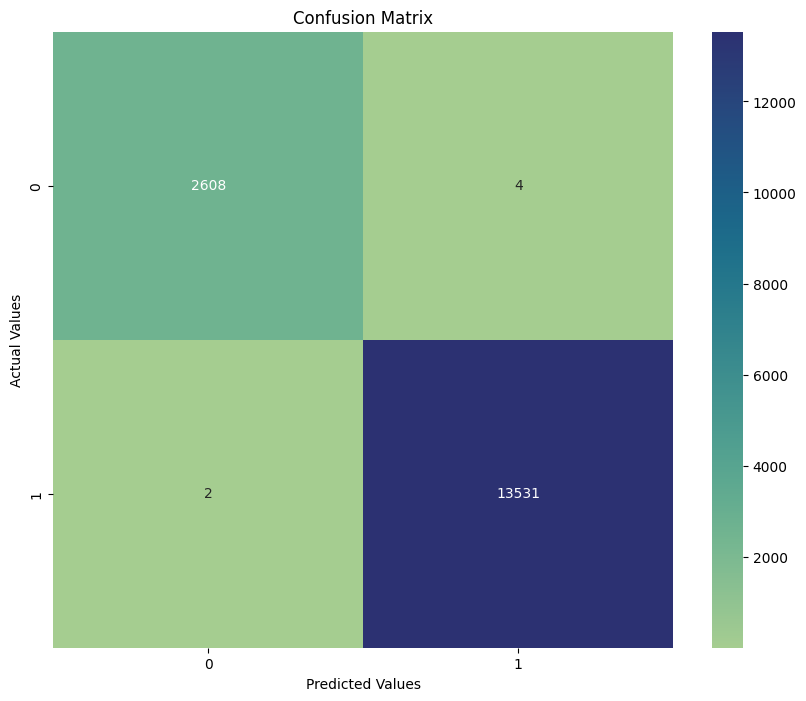

In [26]:
show_result(y_test,lr_prediction)

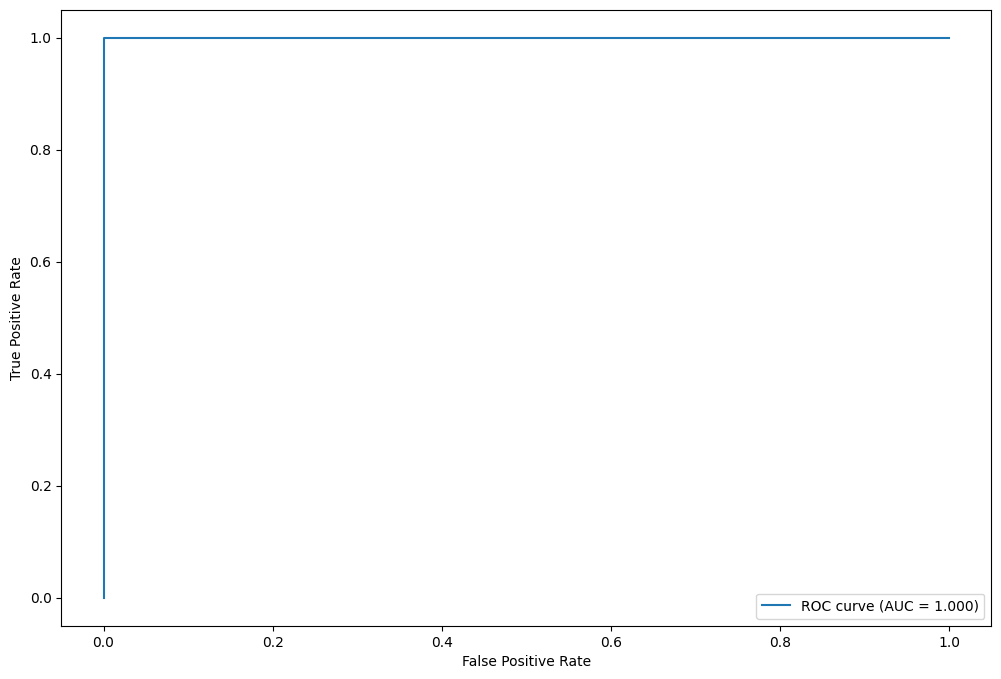

In [29]:
plot_curve(y_test,lr_proba)

# SVM

In [33]:
svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)

SVC(probability=True)

In [34]:
svm_prediction = svm_clf.predict(X_test)

In [35]:
svm_proba = svm_clf.predict_proba(X_test)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2612
           1       0.99      1.00      1.00     13533

    accuracy                           1.00     16145
   macro avg       1.00      0.99      0.99     16145
weighted avg       1.00      1.00      1.00     16145



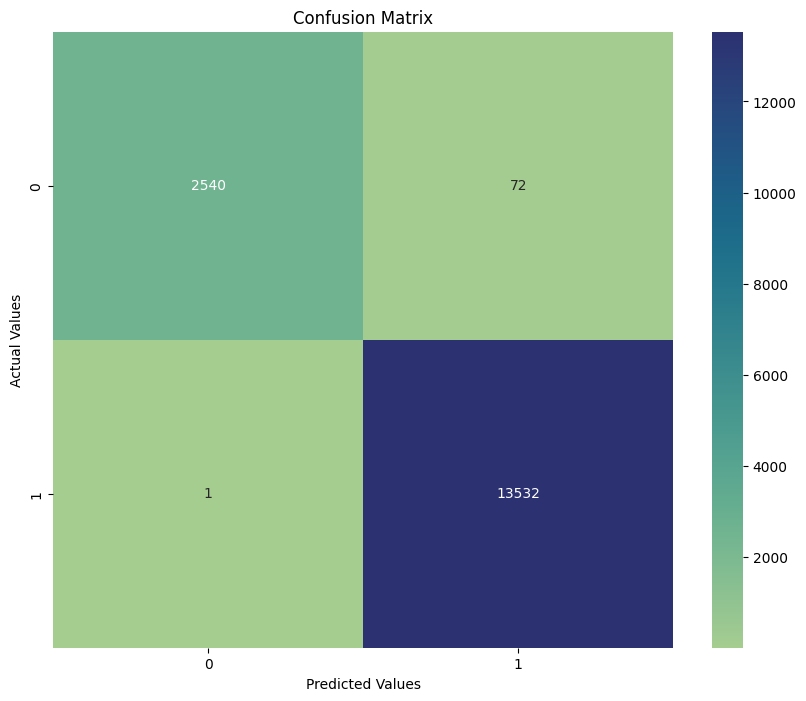

In [36]:
show_result(y_test,svm_prediction)

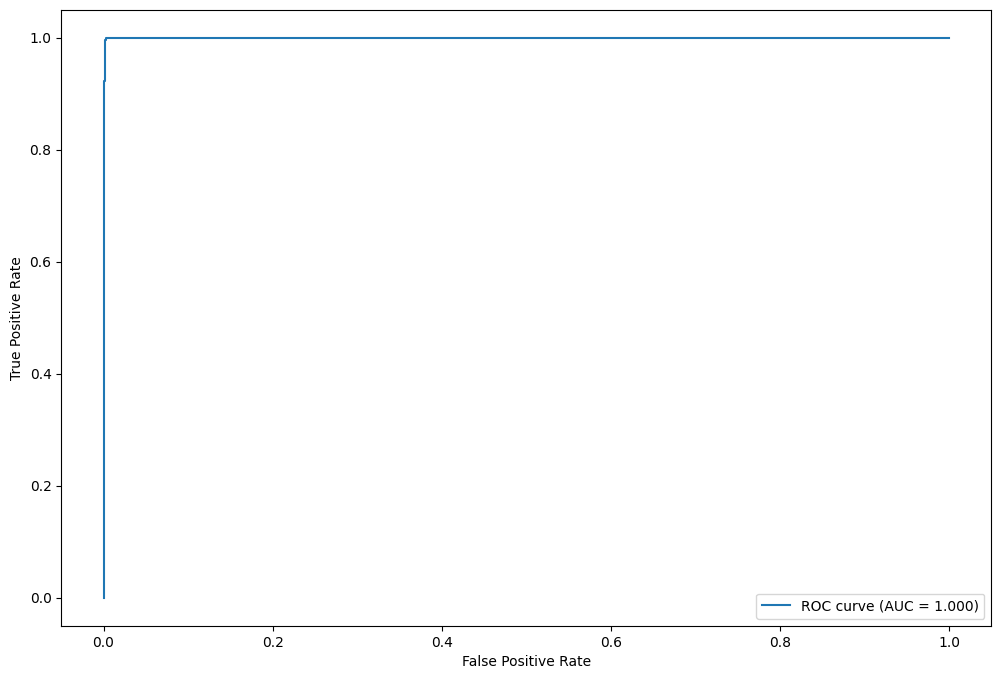

In [37]:
plot_curve(y_test,svm_proba)